# EDA

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/taxi_trip_pricing.csv")

In [29]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


base_fare = grundpris

In [30]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [31]:
df.describe().T.drop(columns="count")

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


- Per_Km_Rate = pris per körd kilometer.
- Per_Minute_Rate = pris per minut under resan eller väntetid.

Som label så kommer jag att använda 'Trip_Price'

Kolumner som känns rimliga för features är:
- Time_of_Day
- Day_of_Week
- Passenger_Count
- Traffic_Conditions
- Trip_Distance_km

dem andra kolumnerna kommer man inte veta om för ens taxi resan är över.
Det kan bli 'target leakage' om dessa är med:
- Trip_Duration_Minutes - inte tillgängligt innan resan, så det blir olämpligt som input-feature

Dessa läcker prislogiken och riskerar 'target leakage':
- Base_Fare
- Per_Km_Rate
- Per_Minute_Rate

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [33]:
df[df["Trip_Price"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
6,122,16.58,Evening,NaN,2.0,Low,Clear,4.46,1.23,0.16,62.79,NaN
27,624,31.29,Morning,Weekday,3.0,Medium,Rain,4.41,NaN,0.21,50.19,NaN
3,32,4.19,Morning,Weekday,1.0,Low,Clear,4.07,1.89,0.19,69.06,NaN
31,643,17.05,Afternoon,Weekday,4.0,High,Rain,4.63,0.90,0.25,63.82,NaN
12,214,35.90,NaN,Weekend,2.0,High,Clear,4.03,1.79,0.13,107.25,NaN
30,640,1.98,Afternoon,Weekday,3.0,Low,Clear,3.40,1.92,0.15,51.56,NaN
37,753,17.41,Morning,Weekday,NaN,Medium,Clear,2.05,1.86,NaN,39.98,NaN
48,991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN
44,910,29.92,Afternoon,Weekday,1.0,Low,Clear,2.14,1.14,0.28,23.10,NaN
34,676,6.49,Morning,Weekday,3.0,Medium,NaN,3.68,NaN,0.19,31.66,NaN


In [34]:
df["Per_Km_Rate"].sort_values().unique()

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71,
       1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82,
       1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93,
       1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.  ,  n

# Trip_Price (label)
- 49 nulls
- finns inga extrema outliers
- trip_price är höger snedfördelat, vilket är rimligt då det förekommer färre längre resor än korta

In [35]:
df["Trip_Price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Trip_Price
Non-Null Count  Dtype  
--------------  -----  
951 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [36]:
df["Trip_Price"].isna().sum()
df["Trip_Price"].describe()
df["Trip_Price"].isna().mean() * 100

np.float64(4.9)

In [37]:
df["Trip_Price"].sort_values().unique()

array([  6.1269    ,   6.4729    ,   8.6709    ,   8.7296    ,
         8.9203    ,   9.8005    ,   9.8718    ,   9.9494    ,
        10.2366    ,  10.4444    ,  11.2613    ,  11.2645    ,
        11.3358    ,  11.5061    ,  11.597     ,  12.1141    ,
        12.2396    ,  12.5567    ,  12.6264    ,  12.7333    ,
        12.9998    ,  13.0646    ,  13.3746    ,  13.4484    ,
        13.9136    ,  13.9334    ,  13.9727    ,  14.6127    ,
        14.6611    ,  14.8186    ,  14.892     ,  14.935     ,
        15.0994    ,  15.1029    ,  15.5675    ,  15.618     ,
        16.1211    ,  16.1592    ,  16.5256    ,  16.6464    ,
        16.834     ,  16.9168    ,  16.9284    ,  17.1476    ,
        17.1693    ,  17.6621    ,  17.9592    ,  18.7636    ,
        18.8626    ,  19.0904    ,  19.1069    ,  19.145     ,
        19.1962    ,  19.2572    ,  19.2643    ,  19.2698    ,
        19.3694    ,  19.4986    ,  19.5819    ,  19.6645    ,
        19.7235    ,  19.8829    ,  19.9412    ,  19.94

In [38]:
df = df.dropna(subset=["Trip_Price"])

In [39]:
df["Trip_Price"].isna().sum()

np.int64(0)

In [83]:
df["Trip_Distance_km"].describe()

count    727.000000
mean      27.564619
std       20.569374
min        1.270000
25%       12.880000
50%       26.030000
75%       38.815000
max      146.067047
Name: Trip_Distance_km, dtype: float64

In [94]:
df[df["Trip_Price"] > 200][["Trip_Price", "Trip_Distance_km", "Day_of_Week", "Time_of_Day"]].sort_values("Trip_Price")


,Trip_Price,Trip_Distance_km,Day_of_Week,Time_of_Day
22,201.869509,105.943550,Weekend,Night
267,206.699570,116.196064,Weekend,Afternoon
835,224.914663,126.547628,Weekend,Afternoon
108,233.008285,112.830958,Weekday,Afternoon
797,239.171407,108.146994,Weekday,Morning
338,248.295209,116.667681,Weekday,Morning
110,274.535087,102.747556,Weekday,Evening
268,276.840597,139.062230,Weekday,Afternoon
27,280.877302,138.098328,Weekend,Evening
532,296.088697,139.476515,Weekday,Evening


Text(0.5, 1.0, 'Distribution of trip price')

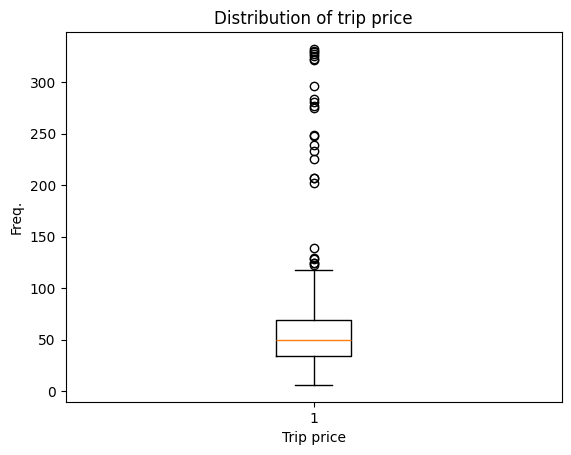

In [41]:
plt.boxplot(df["Trip_Price"])
plt.xlabel("Trip price")
plt.ylabel("Freq.")
plt.title("Distribution of trip price")


Text(0.5, 1.0, 'Distribution of trip price')

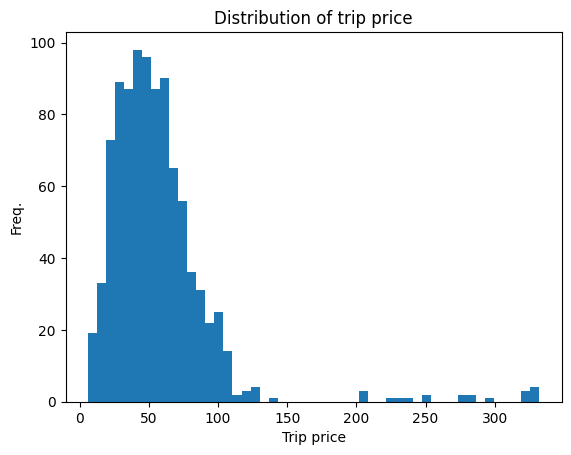

In [42]:
plt.hist(df["Trip_Price"], bins=50)
plt.xlabel("Trip price")
plt.ylabel("Freq.")
plt.title("Distribution of trip price")


tycker allt ser rimligt ut, så jag kommer inte ta bort några outliers

# Time_of_Day
- kanske ändra till strings
- 50 nulls


In [43]:
df["Time_of_Day"].info()

<class 'pandas.core.series.Series'>
Index: 951 entries, 0 to 999
Series name: Time_of_Day
Non-Null Count  Dtype 
--------------  ----- 
902 non-null    object
dtypes: object(1)
memory usage: 14.9+ KB


In [44]:
df["Time_of_Day"].isna().sum()
df["Time_of_Day"].sort_values().unique()

array(['Afternoon', 'Evening', 'Morning', 'Night', nan], dtype=object)

In [45]:
df[df["Time_of_Day"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
10,162,32.040000,NaN,Weekday,4.0,Low,Clear,4.44,1.02,0.41,9.10,40.851800
47,934,9.410000,NaN,Weekend,3.0,Low,Clear,4.32,0.53,0.48,39.21,28.128100
8,140,48.160000,NaN,Weekend,1.0,NaN,Rain,3.72,1.63,0.28,100.12,110.254400
36,700,27.100000,NaN,Weekday,3.0,High,Clear,4.11,1.05,0.18,113.75,53.040000
45,900,11.190000,NaN,Weekday,3.0,Low,Clear,4.05,0.60,0.30,84.00,35.964000
17,298,31.520000,NaN,Weekday,1.0,Low,Clear,4.89,0.65,0.19,19.55,29.092500
37,709,34.390000,NaN,Weekday,4.0,Low,Clear,2.15,1.69,0.16,72.05,71.797100
1,56,5.340000,NaN,Weekday,2.0,Low,Clear,2.34,NaN,0.18,12.72,10.236600
7,137,NaN,NaN,NaN,3.0,Low,Clear,4.52,1.38,0.35,57.56,73.587000
33,603,5.350000,NaN,Weekday,1.0,Low,Clear,4.72,1.42,0.12,87.36,22.800200


In [46]:
df = df.dropna(subset=["Time_of_Day"])

# Day_of_Week
- kanske ändra till strings
- 50 nulls

In [47]:
df["Day_of_Week"].info()

<class 'pandas.core.series.Series'>
Index: 902 entries, 0 to 999
Series name: Day_of_Week
Non-Null Count  Dtype 
--------------  ----- 
857 non-null    object
dtypes: object(1)
memory usage: 14.1+ KB


In [48]:
df["Day_of_Week"].unique()
df["Day_of_Week"].isna().sum()

np.int64(45)

In [49]:
df[df["Day_of_Week"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
35,787,20.64,Afternoon,NaN,3.0,Medium,NaN,3.30,0.93,0.11,99.33,33.4215
1,19,15.27,Morning,NaN,NaN,Low,Clear,3.93,0.73,0.12,NaN,27.3543
34,783,17.94,Afternoon,NaN,2.0,Low,Rain,4.14,1.43,NaN,15.13,33.2741
13,221,28.85,Morning,NaN,1.0,High,Clear,3.27,0.61,0.47,91.67,63.9534
8,125,21.93,Afternoon,NaN,3.0,Low,NaN,4.53,0.76,NaN,74.52,48.0240
30,712,24.11,Evening,NaN,2.0,Medium,Clear,3.20,0.90,0.11,12.40,26.2630
32,737,41.01,Morning,NaN,1.0,Medium,Clear,3.95,1.80,0.42,16.56,84.7232
39,848,25.61,Evening,NaN,3.0,High,Clear,3.79,1.56,0.29,79.89,66.9097
42,893,20.46,Morning,NaN,NaN,Low,Clear,4.08,1.30,0.39,88.60,65.2320
33,749,31.59,Morning,NaN,3.0,High,NaN,2.26,1.72,0.42,40.38,73.5544


In [50]:
df = df.dropna(subset=["Day_of_Week"])

# Passenger_Count
- 50 nulls
- allt annat ser bra ut, inget orimligt

In [51]:
df["Passenger_Count"].describe()

count    814.000000
mean       2.487715
std        1.105381
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Passenger_Count, dtype: float64

In [52]:
df["Passenger_Count"].info()
df["Passenger_Count"].sort_values().unique()

<class 'pandas.core.series.Series'>
Index: 857 entries, 0 to 999
Series name: Passenger_Count
Non-Null Count  Dtype  
--------------  -----  
814 non-null    float64
dtypes: float64(1)
memory usage: 13.4 KB


array([ 1.,  2.,  3.,  4., nan])

In [53]:
df["Passenger_Count"].isna().sum()

np.int64(43)

In [54]:
df[df["Passenger_Count"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
29,558,38.00,Evening,Weekday,NaN,High,Clear,4.54,1.85,0.29,30.31,83.6299
40,796,NaN,Evening,Weekday,NaN,NaN,Clear,3.05,0.74,0.35,105.71,74.5843
8,276,40.12,Morning,Weekend,NaN,High,Clear,3.88,1.61,0.24,116.97,96.5460
26,534,38.68,Afternoon,Weekend,NaN,Low,Clear,3.92,1.17,0.42,57.24,73.2164
34,646,30.09,Morning,Weekend,NaN,Low,Clear,3.54,1.63,0.22,45.84,62.6715
22,461,32.81,Afternoon,Weekend,NaN,Low,Clear,4.84,NaN,0.23,64.74,55.8212
11,292,41.31,Afternoon,Weekday,NaN,Medium,Clear,4.90,1.10,NaN,21.18,56.0596
5,213,11.99,Evening,Weekend,NaN,Medium,Rain,4.84,1.74,0.28,54.06,40.8394
0,33,47.50,Morning,Weekend,NaN,Low,Clear,4.39,0.51,0.30,95.55,57.2800
3,100,2.54,Morning,Weekend,NaN,Low,Clear,2.80,1.30,0.37,53.11,25.7527


In [55]:
df = df.dropna(subset=["Passenger_Count"])

# Traffic_Conditions
- 50 nulls

In [56]:
df["Traffic_Conditions"].info()

<class 'pandas.core.series.Series'>
Index: 814 entries, 0 to 999
Series name: Traffic_Conditions
Non-Null Count  Dtype 
--------------  ----- 
768 non-null    object
dtypes: object(1)
memory usage: 12.7+ KB


In [57]:
df["Traffic_Conditions"].isna().sum()
df["Traffic_Conditions"].unique()


array(['Low', 'High', 'Medium', nan], dtype=object)

In [58]:
df[df["Traffic_Conditions"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
42,869,47.36,Evening,Weekday,1.0,NaN,Clear,NaN,1.85,0.15,71.86,102.8850
2,13,11.40,Morning,Weekday,3.0,NaN,Clear,4.12,NaN,0.15,84.12,36.1180
10,204,30.72,Afternoon,Weekend,3.0,NaN,Clear,4.75,1.19,0.12,35.20,45.5308
7,175,9.54,Afternoon,Weekend,1.0,NaN,Rain,2.10,1.79,0.33,42.43,33.1785
6,143,15.74,Afternoon,Weekday,2.0,NaN,Clear,3.05,1.84,0.21,35.48,39.4624
19,416,15.37,Morning,Weekday,1.0,NaN,Clear,4.95,1.07,0.37,64.12,45.1203
33,692,25.87,Afternoon,Weekday,2.0,NaN,Rain,4.35,1.26,0.23,112.39,62.7959
44,966,36.23,Morning,Weekend,4.0,NaN,Rain,3.61,NaN,0.27,NaN,97.1094
3,99,6.29,Afternoon,Weekday,3.0,NaN,Clear,4.15,1.37,0.21,80.37,29.6450
36,722,4.26,Afternoon,Weekend,4.0,NaN,Clear,2.57,0.70,0.14,66.19,14.8186


In [59]:
df = df.dropna(subset=["Traffic_Conditions"])

# Trip_Distance_km
- 50 nulls
- inga orimliga värden. det är höger snedfördelat, vilket är rimligt. det är vanligare med korta resor än långa

In [60]:
df["Trip_Distance_km"].info()

<class 'pandas.core.series.Series'>
Index: 768 entries, 0 to 999
Series name: Trip_Distance_km
Non-Null Count  Dtype  
--------------  -----  
727 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


In [61]:
df["Trip_Distance_km"].describe()

count    727.000000
mean      27.564619
std       20.569374
min        1.270000
25%       12.880000
50%       26.030000
75%       38.815000
max      146.067047
Name: Trip_Distance_km, dtype: float64

In [62]:
df[df["Trip_Distance_km"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
12,282,NaN,Afternoon,Weekday,1.0,Low,Clear,3.79,1.25,0.45,40.52,46.2740
39,970,NaN,Morning,Weekday,4.0,High,Clear,3.97,1.73,0.19,58.48,73.0708
9,197,NaN,Night,Weekend,3.0,Medium,Clear,3.22,1.03,0.38,72.79,77.1890
14,357,NaN,Afternoon,Weekday,3.0,Medium,Rain,2.03,0.91,0.19,12.42,31.4168
16,404,NaN,Afternoon,Weekday,2.0,High,Rain,2.30,0.89,0.12,74.77,26.1176
0,4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
28,770,NaN,Afternoon,Weekday,1.0,Medium,Clear,3.05,0.98,0.24,NaN,19.0904
37,943,NaN,Evening,Weekend,1.0,Low,Snow,2.10,1.47,0.27,48.69,76.4865
26,725,NaN,Morning,Weekday,1.0,Medium,Clear,3.88,1.96,0.32,111.65,122.4180
23,584,NaN,Night,Weekday,4.0,Low,Clear,2.73,1.47,0.37,42.88,65.6944


In [63]:
df["Trip_Distance_km"].sort_values().unique()

array([  1.27      ,   1.45      ,   1.54      ,   1.56      ,
         1.64      ,   1.71      ,   1.81      ,   1.89      ,
         1.9       ,   1.97      ,   2.1       ,   2.14      ,
         2.19      ,   2.24      ,   2.25      ,   2.29      ,
         2.3       ,   2.33      ,   2.53      ,   2.64      ,
         2.69      ,   2.79      ,   2.8       ,   2.81      ,
         2.83      ,   2.93      ,   3.        ,   3.11      ,
         3.22      ,   3.23      ,   3.25      ,   3.28      ,
         3.3       ,   3.52      ,   3.53      ,   3.54      ,
         3.68      ,   3.85      ,   4.11      ,   4.22      ,
         4.4       ,   4.46      ,   4.49      ,   4.65      ,
         4.68      ,   4.81      ,   4.93      ,   5.01      ,
         5.06      ,   5.12      ,   5.16      ,   5.18      ,
         5.19      ,   5.26      ,   5.42      ,   5.47      ,
         5.49      ,   5.56      ,   5.59      ,   5.63      ,
         5.76      ,   5.79      ,   5.87      ,   5.94

In [64]:
df = df.dropna(subset=["Trip_Distance_km"])

Text(0.5, 1.0, 'Distribution of trip distance')

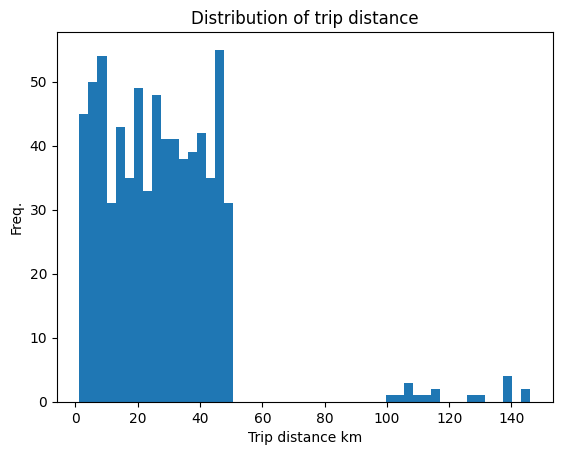

In [65]:
plt.hist(df["Trip_Distance_km"], bins=50)
plt.xlabel("Trip distance km")
plt.ylabel("Freq.")
plt.title("Distribution of trip distance")

# NULLS
- då det är som mest 50 nulls i kolumnerna kommer jag kasta dem, då jag tycker det är för få för att göra något med

In [66]:
colums_to_use = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Trip_Distance_km", "Passenger_Count", "Trip_Price"]
df[colums_to_use].reset_index().isna().sum()

index                 0
Time_of_Day           0
Day_of_Week           0
Traffic_Conditions    0
Trip_Distance_km      0
Passenger_Count       0
Trip_Price            0
dtype: int64

## Object -> strings
- jag gör de features som är objects till strings, för att få en tydlig och konsekvent strängtyp

In [67]:
cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions"]
df[cols] = df[cols].astype("string")

# Cleaned dataset

In [68]:
features = [
    "Time_of_Day",
    "Day_of_Week",
    "Passenger_Count",
    "Traffic_Conditions",
    "Trip_Distance_km"
]

label = "Trip_Price"

In [69]:
df_clean = df[features + [label]].copy()

In [70]:
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time_of_Day         727 non-null    string 
 1   Day_of_Week         727 non-null    string 
 2   Passenger_Count     727 non-null    float64
 3   Traffic_Conditions  727 non-null    string 
 4   Trip_Distance_km    727 non-null    float64
 5   Trip_Price          727 non-null    float64
dtypes: float64(3), string(3)
memory usage: 39.8 KB


,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Trip_Distance_km,Trip_Price
0,Morning,Weekday,3.0,Low,19.35,36.2624
2,Evening,Weekend,1.0,High,36.87,52.9032
3,Evening,Weekday,4.0,Low,30.33,36.4698
5,Afternoon,Weekend,2.0,Medium,8.64,60.2028
6,Afternoon,Weekday,4.0,High,3.85,11.2645


In [71]:
df_clean.to_csv("clean_taxi_data.csv", index=False)

In [72]:
df_clean

,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Trip_Distance_km,Trip_Price
0,Morning,Weekday,3.0,Low,19.35,36.2624
2,Evening,Weekend,1.0,High,36.87,52.9032
3,Evening,Weekday,4.0,Low,30.33,36.4698
5,Afternoon,Weekend,2.0,Medium,8.64,60.2028
6,Afternoon,Weekday,4.0,High,3.85,11.2645
...,...,...,...,...,...,...
995,Afternoon,Weekend,4.0,Medium,5.49,34.4049
996,Night,Weekday,4.0,Medium,45.95,62.1295
997,Morning,Weekday,3.0,Low,7.70,33.1236
998,Morning,Weekday,1.0,Low,47.56,61.2090
